<a href="https://colab.research.google.com/github/Marconi-Lab/Bean-disease-screening-project/blob/progress/simple_classification_model/notebooks/classification3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Input, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow import keras

In [2]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_ds = datagen.flow_from_directory("/content/drive/MyDrive/bean_disease_project/simple_classification_model/dataset2/train", 
                                      target_size=(224, 224), 
                                      class_mode = "categorical", 
                                      batch_size=32)

val_ds = datagen.flow_from_directory("/content/drive/MyDrive/bean_disease_project/simple_classification_model/dataset2/validate",
                                      shuffle=False,
                                      target_size=(224, 224), 
                                      class_mode = "categorical", 
                                      batch_size=32)
test_ds = datagen.flow_from_directory("/content/drive/MyDrive/bean_disease_project/simple_classification_model/dataset2/test",
                                      shuffle=False,
                                      target_size=(224, 224), 
                                      class_mode = "categorical", 
                                      batch_size=32)

Found 960 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [3]:
model = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [4]:
flattened = GlobalMaxPooling2D()(model.layers[-1].output)
hidden = Dense(64, activation="relu")(flattened)
dropout = Dropout(0.5)(hidden)
normalized = BatchNormalization()(dropout)
output = Dense(3, activation="softmax")(normalized)
model = Model(inputs=model.inputs, outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [5]:
opt = Adam(1e-4)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [6]:
history = model.fit(train_ds, validation_data=(val_ds), epochs=10)

Epoch 1/10
30/30 [==============================] - 412s 14s/step - loss: 1.2107 - accuracy: 0.4708 - val_loss: 1.3037 - val_accuracy: 0.4417
Epoch 2/10
30/30 [==============================] - 243s 8s/step - loss: 0.7300 - accuracy: 0.6740 - val_loss: 0.9776 - val_accuracy: 0.5250
Epoch 3/10
30/30 [==============================] - 255s 8s/step - loss: 0.5322 - accuracy: 0.7854 - val_loss: 0.8842 - val_accuracy: 0.5750
Epoch 4/10
30/30 [==============================] - 239s 8s/step - loss: 0.4431 - accuracy: 0.8208 - val_loss: 0.7762 - val_accuracy: 0.6583
Epoch 5/10
30/30 [==============================] - 228s 8s/step - loss: 0.3474 - accuracy: 0.8635 - val_loss: 0.7190 - val_accuracy: 0.6667
Epoch 6/10
30/30 [==============================] - 197s 7s/step - loss: 0.2957 - accuracy: 0.9062 - val_loss: 0.7115 - val_accuracy: 0.6750
Epoch 7/10
30/30 [==============================] - 201s 7s/step - loss: 0.2212 - accuracy: 0.9375 - val_loss: 0.6870 - val_accuracy: 0.6833
Epoch 8/10
3

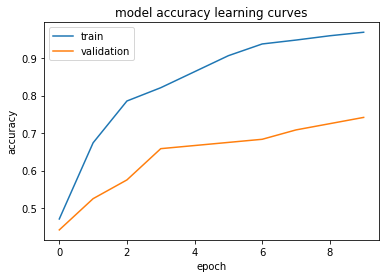

In [7]:
# accuracy curve
pyplot.plot(history.history["accuracy"])
pyplot.plot(history.history["val_accuracy"])
pyplot.title("model accuracy learning curves")
pyplot.ylabel("accuracy")
pyplot.xlabel("epoch")
pyplot.legend(['train', 'validation'], loc="upper left")
pyplot.show()

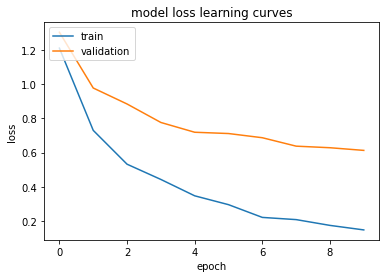

In [8]:
# loss curve
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss learning curves')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

In [9]:
model.save("/content/drive/MyDrive/bean_disease_project/simple_classification_model/model_moblienet_v2.h5")

In [10]:
prediction = model.predict(test_ds) # predict probabilities
y_pred = [int(round(i[0])) for i in prediction] # converting probabilities to binary outputs

In [11]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [12]:
def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=pyplot.cm.OrRd
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    pyplot.imshow(cm, interpolation='nearest', cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks = np.arange(len(classes))
    pyplot.xticks(tick_marks, classes, rotation=45)
    pyplot.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j, i, "{:0.2f}".format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
    pyplot.tight_layout()
    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')

In [13]:
target_names = ["angular_leaf_spot", "bean_rust", "healthy"]

In [14]:
print("Confusion Matrix")
conf_matrix = confusion_matrix(test_ds.classes, y_pred)
print(conf_matrix)

Confusion Matrix
[[15 25  0]
 [37  3  0]
 [39  1  0]]


Normalized confusion matrix
[[0.375 0.625 0.   ]
 [0.925 0.075 0.   ]
 [0.975 0.025 0.   ]]


<function matplotlib.pyplot.show>

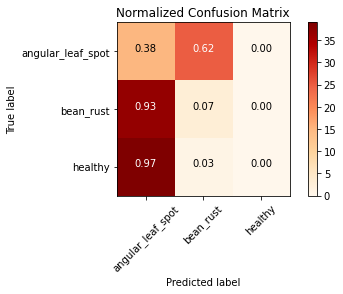

In [15]:
pyplot.figure(0)
plot_confusion_matrix(conf_matrix, classes=target_names, normalize=True, title="Normalized Confusion Matrix")
pyplot.show

Confusion matrix, without normalization
[[15 25  0]
 [37  3  0]
 [39  1  0]]


<function matplotlib.pyplot.show>

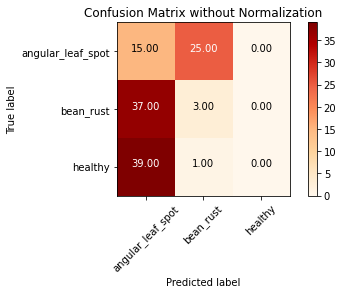

In [16]:
pyplot.figure(1)
plot_confusion_matrix(conf_matrix, classes=target_names, normalize=False, title="Confusion Matrix without Normalization")
pyplot.show

In [17]:
print(classification_report(test_ds.classes, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

angular_leaf_spot       0.16      0.38      0.23        40
        bean_rust       0.10      0.07      0.09        40
          healthy       0.00      0.00      0.00        40

         accuracy                           0.15       120
        macro avg       0.09      0.15      0.11       120
     weighted avg       0.09      0.15      0.11       120



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
